### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load data

In [2]:
# Load individuals .csv
df_1 = pd.read_csv("ADNI1_Complete_1Yr_1.5T.csv")
df_2 = pd.read_csv("ADNI1_Complete_2Yr_1.5T.csv")
df_3 = pd.read_csv("ADNI1_Complete_3Yr_1.5T.csv")

In [3]:
# Concat all .csv
df = pd.concat([df_1, df_2, df_3])

# Remove extra whitespaces column names
df.columns = df.columns.str.replace(" ", "")

print(f"Shape of dataframe: {df.shape}")
df.head()

Shape of dataframe: (3292, 12)


,ImageDataID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,AcqDate,Format,Downloaded
0,I125941,137_S_1426,MCI,M,85,4,MRI,MPR-R; GradWarp; N3; Scaled,Processed,10/30/2008,NiFTI,NaN
1,I121703,128_S_1408,MCI,M,73,4,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,9/19/2008,NiFTI,NaN
2,I121637,037_S_1421,MCI,F,76,4,MRI,MPR; GradWarp; N3; Scaled,Processed,9/17/2008,NiFTI,NaN
3,I122382,128_S_1407,MCI,F,76,4,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,9/05/2008,NiFTI,NaN
4,I121689,127_S_1427,MCI,F,71,4,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,9/02/2008,NiFTI,NaN


In [4]:
df = df[["ImageDataID", "Subject", "Group", "Sex", "Age", "Visit", "AcqDate"]]
df 

,ImageDataID,Subject,Group,Sex,Age,Visit,AcqDate
0,I125941,137_S_1426,MCI,M,85,4,10/30/2008
1,I121703,128_S_1408,MCI,M,73,4,9/19/2008
2,I121637,037_S_1421,MCI,F,76,4,9/17/2008
3,I122382,128_S_1407,MCI,F,76,4,9/05/2008
4,I121689,127_S_1427,MCI,F,71,4,9/02/2008
...,...,...,...,...,...,...,...
349,I323026,137_S_0994,MCI,F,58,8,12/01/2009
350,I204818,137_S_1414,MCI,M,78,8,8/18/2010
351,I204829,941_S_1194,CN,M,88,8,2/13/2010
352,I137271,941_S_1194,CN,M,87,6,2/14/2009


### Processing

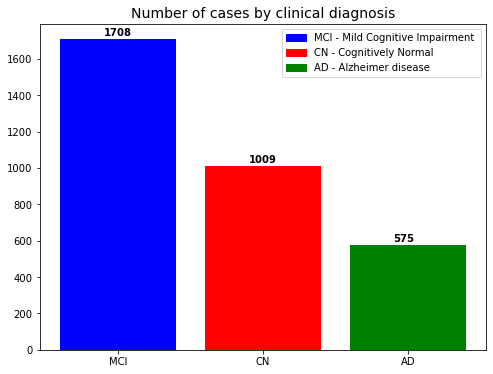

In [15]:
fig, axes = plt.subplots(figsize=(8,6))

# Plot bar
axes.bar(x = df["Group"].value_counts().index, 
         height = df["Group"].value_counts().values,
        color = ["b","r","g"])

axes.set_title("Number of cases by clinical diagnosis", fontsize = 14);

# Plot legend
colors = {'MCI - Mild Cognitive Impairment ':'blue', 
          'CN - Cognitively Normal':'red',
          'AD - Alzheimer disease':'green',}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
axes.legend(handles, labels);

# Plot annotations
for i, v in enumerate(df["Group"].value_counts().values):
    axes.text(i-0.1, v + 20, str(int(v)), color='black', fontweight='bold')